In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
filename = "average.txt"


store = []

for row in csv.reader(open(filename), delimiter =" "):
    store.append(row)

X = np.array([float(i) for i in store[0]])
Y = np.array([float(i) for i in store[1]])

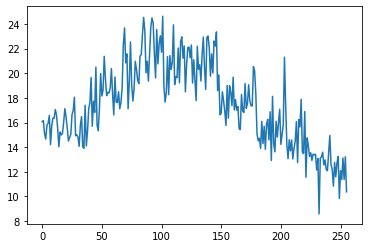

In [5]:
plt.plot(X,Y)

In [6]:
filename = "all_scans.txt"


alldata = []

for row in csv.reader(open(filename), delimiter =" "):
    alldata.append([float(i) for i in row])

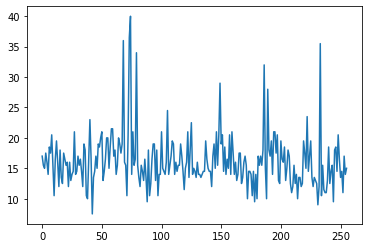

In [7]:
plt.plot(X, alldata[0])

In [9]:
avg = np.zeros(len(alldata))

for i in range(len(alldata)):
    avg[i] = np.mean(alldata[i])


(array([2., 1., 0., 0., 0., 2., 2., 3., 5., 1., 1., 7., 1., 4., 1., 4., 4.,
        6., 7., 5.]),
 array([ 0.75976562,  2.04257812,  3.32539062,  4.60820312,  5.89101562,
         7.17382812,  8.45664062,  9.73945312, 11.02226562, 12.30507812,
        13.58789062, 14.87070312, 16.15351562, 17.43632812, 18.71914062,
        20.00195312, 21.28476562, 22.56757812, 23.85039062, 25.13320312,
        26.41601562]),
 <BarContainer object of 20 artists>)

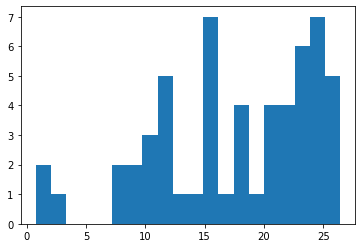

In [11]:
plt.hist(avg, bins=20)

In [14]:
filtered_data = []

for i in range(len(alldata)):
    if avg[i] > 14:
        filtered_data.append(alldata[i])

In [37]:
mean_cleandata = np.zeros(len(filtered_data[0]))
filtered_data = np.array(filtered_data)

for ii in range(len(filtered_data[0])):
    mean_cleandata[ii] = np.mean(filtered_data[:,ii])

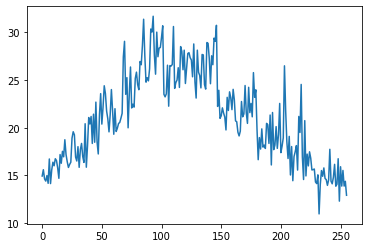

In [38]:
plt.plot(X, mean_cleandata)

In [39]:
def function(t, w, phi, middle, amp):
    return middle + amp*np.sin(w*t + phi)
    
fit = curve_fit(function, np.array(X), mean_cleandata, p0=[np.pi/120, -np.pi/2, 20, 20])

In [41]:
fit

(array([ 0.02374876, -1.15230732, 20.78005573,  5.93978214]),
 array([[ 9.44928971e-07, -1.08104003e-04,  2.36290295e-04,
         -1.17765364e-04],
        [-1.08104003e-04,  1.34422794e-02, -2.69645278e-02,
          1.33435448e-02],
        [ 2.36290295e-04, -2.69645278e-02,  7.85952962e-02,
         -3.07343167e-02],
        [-1.17765364e-04,  1.33435448e-02, -3.07343167e-02,
          5.47926715e-02]]))

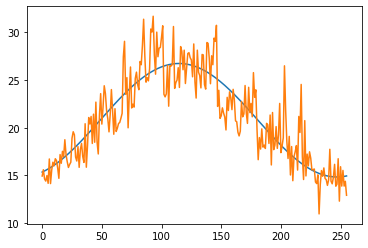

In [42]:
plt.plot(X, function(X, fit[0][0], fit[0][1], fit[0][2], fit[0][3]))
plt.plot(X, mean_cleandata)

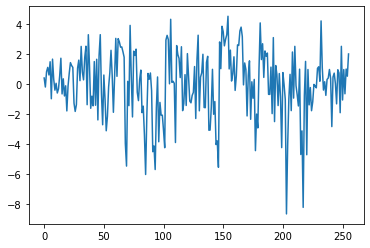

In [43]:
plt.plot(X, function(X, fit[0][0], fit[0][1], fit[0][2], fit[0][3]) - mean_cleandata)

In [44]:
np.argmax(function(X, fit[0][0], fit[0][1], fit[0][2], fit[0][3]))

115

In [45]:
X[115]

115.0

In [46]:
filename = "average_rabi2.txt"


store = []

for row in csv.reader(open(filename), delimiter =" "):
    store.append(row)

X2 = np.array([float(i) for i in store[0]])
Y2 = np.array([float(i) for i in store[1]])

In [47]:
def function(t, w, phi, middle, amp):
    return middle + amp*np.sin(w*t + phi)
    
fit = curve_fit(function, X2, Y2, p0=[np.pi/120, -np.pi/2, 20, 20])

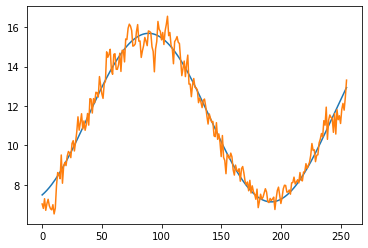

In [48]:
plt.plot(X2, function(X2, fit[0][0], fit[0][1], fit[0][2], fit[0][3]))
plt.plot(X2, Y2)

In [49]:
np.argmax(function(X2, fit[0][0], fit[0][1], fit[0][2], fit[0][3]))

89